#Tiền xử lý dữ liệu

In [21]:
## Kết nối Google Drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
## Thư mục làm việc
folder = '/content/gdrive/My Drive/dataset'

Mounted at /content/gdrive


In [22]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import scipy.stats       as stats
import seaborn           as sbn
import math
import warnings
warnings.filterwarnings('ignore')

In [23]:
!pip install openpyxl
import openpyxl # import the module
import pandas as pd

data = pd.read_excel(folder + '/Fulldata (1).xlsx', engine='openpyxl')

#Kiểm tra dữ liệu bị thiếu

In [24]:
# Kiểm tra tổng số giá trị bị thiếu trong mỗi cột
print("\nSố giá trị bị thiếu trong mỗi cột:")
print(data.isnull().sum())


Số giá trị bị thiếu trong mỗi cột:
Token    0
Tag      0
dtype: int64


#Tách các đặc trưng

In [25]:
# Chuyển tất cả giá trị trong cột 'Token' thành chuỗi
tokens = data['Token'].astype(str).values
labels = data['Tag'].values

X = []
y = []

for token, label in zip(tokens, labels):
    features = {
        'word': token,             # Tính năng từ
        'length': len(token),      # Tính năng độ dài từ
        'is_title': token.istitle()  # Tính năng chữ viết hoa chữ cái đầu
    }
    X.append(features)
    y.append(label)

#Vector hoá dữ liệu - DictVectorizer

In [26]:
# Vectorization
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer()
X_vectorized = vectorizer.fit_transform(X)

#Trực quan hoá

10 từ xuất hiện nhiều nhất:
đất: 2589
tiền: 1528
định: 1494
thuê: 1230
dụng: 1229
sử: 1173
được: 924
quy: 907
theo: 868
tại: 614


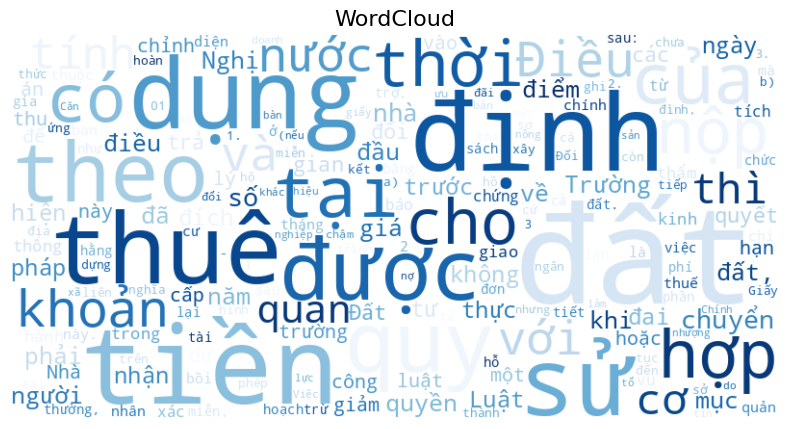

In [27]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Đếm số lần xuất hiện của các từ trong cột 'Token'
word_counts = Counter(tokens)

# Lấy 10 từ xuất hiện nhiều nhất
most_common_words = word_counts.most_common(10)

# In danh sách 10 từ phổ biến nhất
print("10 từ xuất hiện nhiều nhất:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Tạo dữ liệu cho wordcloud
data_for_wordcloud = dict(word_counts)

# Tạo WordCloud với tông màu xanh dương pastel
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues", # Tông màu xanh dương pastel
    prefer_horizontal=1.0
).generate_from_frequencies(data_for_wordcloud)

# Vẽ wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud", fontsize=16)
plt.show()

#Mô hình SVM, Naive Bayes, Random Forest

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Mã hóa nhãn để huấn luyện mô hình
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Huấn luyện các mô hình: SVM, Naive Bayes và Random Forest
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán và chuyển đổi nhãn dự đoán về dạng ban đầu
y_pred_svm = svm_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

SVM Model Evaluation:
              precision    recall  f1-score   support

    B-ACTION       0.00      0.00      0.00        29
      B-DATE       0.82      0.91      0.86       234
    B-ENTITY       0.75      0.09      0.16        33
       B-LAW       0.97      0.89      0.93       131
     B-MONEY       1.00      0.28      0.44        25
    I-ACTION       0.98      0.69      0.81        78
      I-DATE       0.84      0.69      0.76       147
    I-ENTITY       0.95      0.57      0.72       200
       I-LAW       0.94      0.95      0.95      1262
     I-MONEY       0.99      0.88      0.93       373
           O       0.97      0.99      0.98      8268

    accuracy                           0.96     10780
   macro avg       0.84      0.63      0.69     10780
weighted avg       0.96      0.96      0.96     10780

Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

    B-ACTION       0.00      0.00      0.00        29
      B-DATE       0.81   

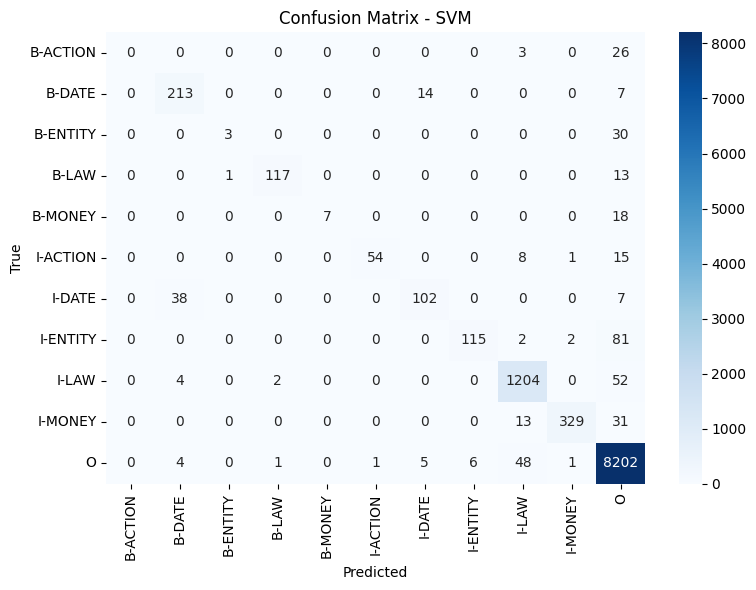

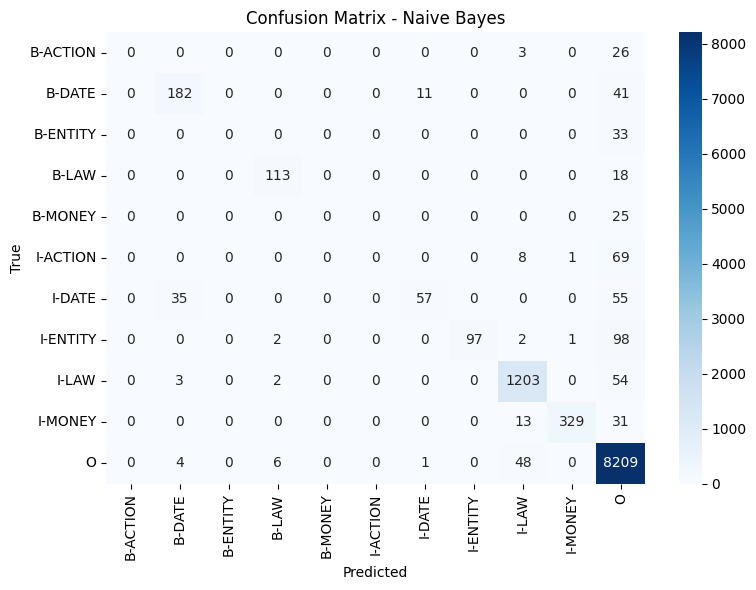

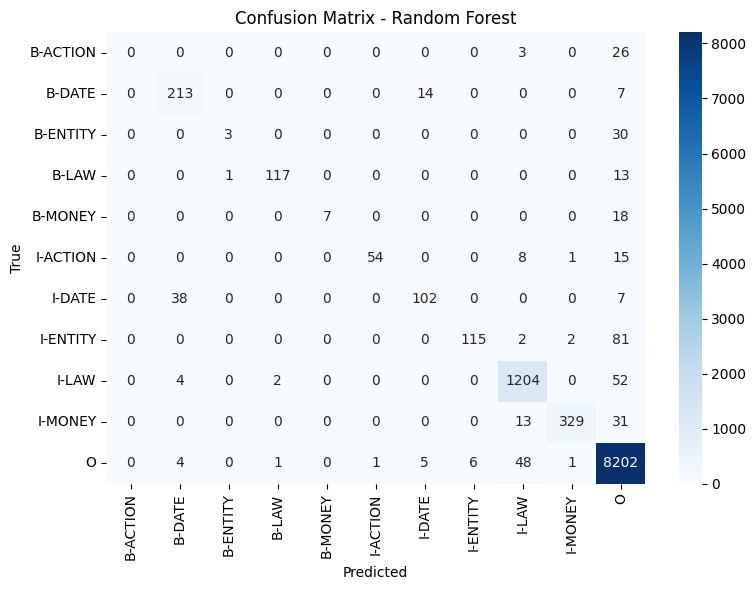

In [29]:
# Chuyển nhãn dự đoán và nhãn thực tế về dạng ban đầu
y_pred_svm_labels = label_encoder.inverse_transform(y_pred_svm)
y_pred_nb_labels = label_encoder.inverse_transform(y_pred_nb)
y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)
y_test_labels = label_encoder.inverse_transform(y_test)

# In báo cáo phân loại cho từng mô hình
print("SVM Model Evaluation:")
print(classification_report(y_test_labels, y_pred_svm_labels))

print("Naive Bayes Model Evaluation:")
print(classification_report(y_test_labels, y_pred_nb_labels))

print("Random Forest Model Evaluation:")
print(classification_report(y_test_labels, y_pred_rf_labels))

# Accuracy cho từng mô hình
print(f"SVM Accuracy: {accuracy_score(y_test_labels, y_pred_svm_labels):.4f}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test_labels, y_pred_nb_labels):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test_labels, y_pred_rf_labels):.4f}")

# Vẽ confusion matrix cho từng mô hình
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng chéo
    plt.show()

# Vẽ confusion matrix cho từng mô hình
plot_confusion_matrix(y_test_labels, y_pred_svm_labels, 'SVM')
plot_confusion_matrix(y_test_labels, y_pred_nb_labels, 'Naive Bayes')
plot_confusion_matrix(y_test_labels, y_pred_rf_labels, 'Random Forest')

#LTMS and phoBert

Sample of y_train: [ 8 10]
Sample of y_test: [10 10]
Shape of y_train_one_hot: (43118, 11)
Shape of y_test_one_hot: (10780, 11)
Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 75s 431ms/step - accuracy: 0.7401 - loss: 1.0908 - val_accuracy: 0.7670 - val_loss: 0.8518
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 466ms/step - accuracy: 0.7651 - loss: 0.8534 - val_accuracy: 0.7630 - val_loss: 0.8297
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 441ms/step - accuracy: 0.7654 - loss: 0.8306 - val_accuracy: 0.7668 - val_loss: 0.8218
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 444ms/step - accuracy: 0.7636 - loss: 0.8244 - val_accuracy: 0.7628 - val_loss: 0.8176
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 468ms/step - accuracy: 0.7672 - loss: 0.8170 - val_accuracy: 0.7668 - val_loss: 0.8155
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 469ms/step - accuracy: 0.7644 - loss: 0.8220 - val_accuracy: 0.7668 - val_loss: 0.8140
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 445ms/step - accuracy: 0.7653 - loss: 0.81

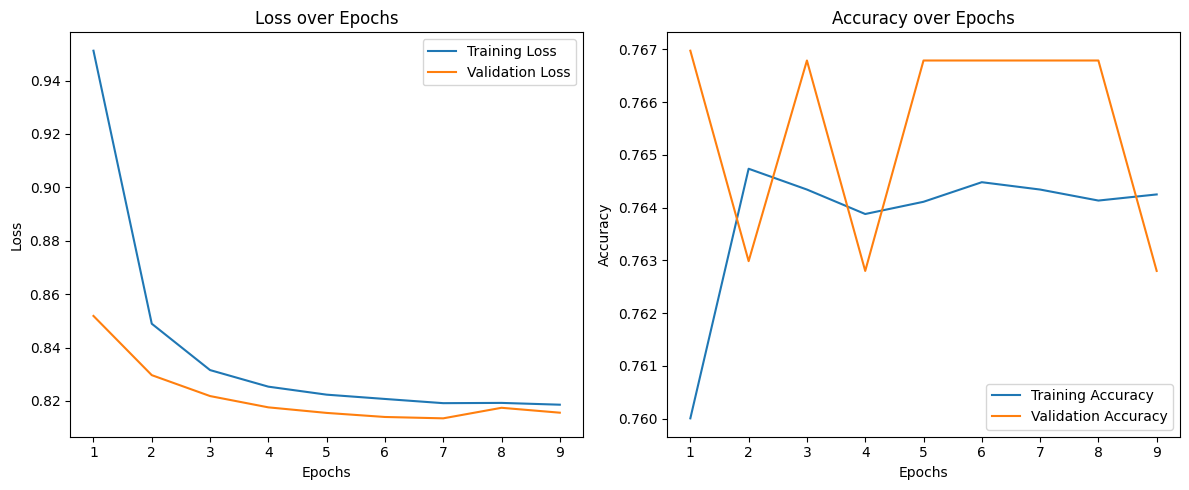

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping  # Thêm EarlyStopping

# Kiểm tra và đảm bảo rằng y_train và y_test là danh sách các chuỗi nhãn
print(f"Sample of y_train: {y_train[:2]}")
print(f"Sample of y_test: {y_test[:2]}")

# Kết hợp tất cả nhãn từ y_train và y_test để mã hóa một lần
all_labels = np.concatenate((y_train, y_test))  # Kết hợp cả nhãn từ tập huấn luyện và kiểm tra

# Mã hóa nhãn - Fit trên tất cả nhãn có trong cả y_train và y_test
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)  # Fit cả trên tập huấn luyện và kiểm tra

# Chuyển đổi nhãn thành one-hot encoding cho từng token trong chuỗi
y_train_encoded = [label_encoder.transform([tag])[0] for tag in y_train]  # Chuyển đổi thành nhãn mã hóa
y_test_encoded = [label_encoder.transform([tag])[0] for tag in y_test]  # Chuyển đổi thành nhãn mã hóa

# Chuyển nhãn thành one-hot encoding
y_train_one_hot = np.array([to_categorical(label, num_classes=len(label_encoder.classes_)) for label in y_train_encoded])
y_test_one_hot = np.array([to_categorical(label, num_classes=len(label_encoder.classes_)) for label in y_test_encoded])

# Kiểm tra kích thước của y_train_one_hot và y_test_one_hot trước khi gọi np.squeeze()
print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

# Không cần sử dụng np.squeeze() nữa vì kích thước đã hợp lý

# Chuyển đổi X thành mảng numpy (nếu chưa thực hiện)
X_train_array = X_train.toarray()  # Chuyển đổi thành mảng numpy
X_test_array = X_test.toarray()  # Chuyển đổi thành mảng numpy

# Padding nếu cần thiết (đảm bảo tất cả chuỗi có độ dài giống nhau)
X_train_pad = pad_sequences(X_train_array, padding='post', dtype='float32')
X_test_pad = pad_sequences(X_test_array, padding='post', dtype='float32')

# Xây dựng mô hình BiLSTM
model = Sequential()
model.add(Embedding(input_dim=X_train_pad.shape[1], output_dim=100, input_length=X_train_pad.shape[1]))  # Lớp embedding
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.3))  # Tăng dropout lên 0.3 để tránh overfitting
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Lớp đầu ra với softmax

# Biên dịch mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Thiết lập EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)  # Dừng nếu val_loss không cải thiện sau 2 epoch

# Huấn luyện mô hình với EarlyStopping và lưu lại lịch sử
history = model.fit(X_train_pad, y_train_one_hot, batch_size=256, epochs=10, validation_data=(X_test_pad, y_test_one_hot), callbacks=[early_stopping])

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test_pad, y_test_one_hot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Vẽ biểu đồ Loss và Accuracy
epochs = range(1, len(history.history['loss']) + 1)  # Epoch bắt đầu từ 1

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.xticks(epochs)  # Hiển thị tất cả giá trị của epochs trên trục x

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.xticks(epochs)  # Hiển thị tất cả giá trị của epochs trên trục x

plt.tight_layout()
plt.show()

#Kiểm tra mô hình

337/337 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00       131
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00       147
           7       0.00      0.00      0.00       200
           8       0.00      0.00      0.00      1262
           9       0.00      0.00      0.00       373
          10       0.77      1.00      0.87      8268

    accuracy                           0.77     10780
   macro avg       0.07      0.09      0.08     10780
weighted avg       0.59      0.77      0.67     10780



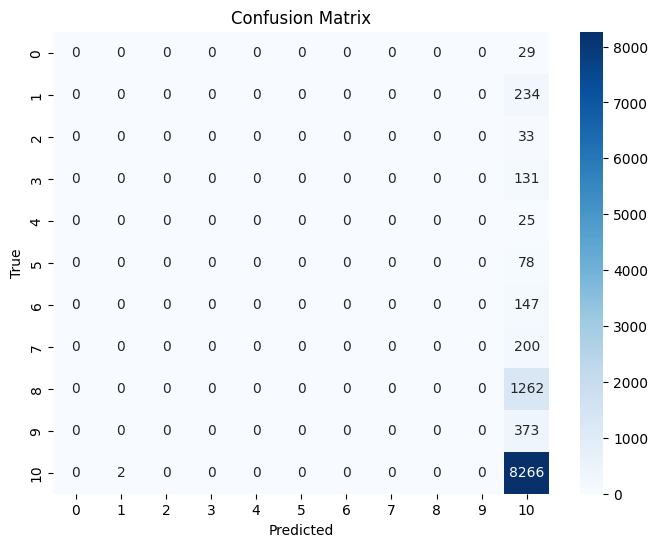

In [31]:
# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_prob = model.predict(X_test_pad)  # Dự đoán xác suất cho mỗi lớp
y_pred_labels = np.argmax(y_pred_prob, axis=-1)  # Chuyển đổi xác suất thành nhãn (chọn lớp có xác suất cao nhất)

# Sử dụng inverse_transform để chuyển nhãn dự đoán và nhãn gốc trở lại dạng ban đầu
y_pred_labels_original = label_encoder.inverse_transform(y_pred_labels)  # Chuyển nhãn dự đoán từ số thành nhãn gốc
y_test_labels_original = label_encoder.inverse_transform(y_test_encoded)  # Chuyển nhãn gốc từ số thành nhãn gốc

# In báo cáo phân loại cho mô hình
print("Classification Report:")
print(classification_report(y_test_labels_original, y_pred_labels_original))  # So sánh với nhãn gốc

# Vẽ confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test_labels_original, y_pred_labels_original, label_encoder.classes_)